# Project: Write a Data Science Blog Post

## Things to consider before planning your trip to Boston.
Data analysis of Airbnb listings in Boston using the CRISP-DM process.

AirBnb is a popular choice for stay across the world as it provides a way to travel in a personalized way.
I have used Boston, one of the popular cities for Airbnb to analyze. I have analyzed the listings offered, the price trend, and the amenities provided. The dataset is available here. For more ideas, visualizations of all Boston datasets you can look here.

## Section 1: Business Understanding
Boston is one of the most visited cities in the world. I will discuss some questions that those who plan to travel to Boston and use Airbnb would find interesting.

I have used CRISP-DM (CRoss Industry Standard Process for Data Mining) in this process. It is a process model with six phases that naturally describes the data science life cycle. The phases are:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deploy

I have tried to answer following questions:
<li><a href=#1.-Which-neighbourhood-of-boston-has-more-listings?-What-type-of-properties-provided-there?>1. Which neighbourhood of boston has more listings? What type of properties provided there?</a></li>
<li><a href=#2.-What-is-the-availability-of-the-listings-across-each-neighbourhood-and-their-review/reponsiveness-?>2. What is the availability of the listings across each neighbourhood and their review/reponsiveness ?</a></li>
<li><a href=#3.-What-is-the-price-trend-among-the-neighbourhood-throughout-the-year?what-is-the-weekend-price-trend?>3. What is the price trend among the neighbourhood throughout the year?what is the weekend price trend?</a></li>
<li><a href=#4.-Which-amenities,-in-general-can-you-expect-and-what-are-some-of-rare-ammenties-and-how-much-extra-you-have-to-pay-to-get-those?>4. Which amenities, in general can you expect and what are some of rare ammenties and how much extra you have to pay to get those?</a></li>
<li><a href=#5.-Which-neighbourhood-is-seeing-surge-in-listings?>5. Which neighbourhood is seeing surge in listings?</a></li>


## Section 2: Data Understanding

### 2.1 Gather

In [1]:
# data from http://insideairbnb.com/get-the-data.html
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
import numpy as np

sns.set(rc={'figure.figsize':(11, 4)})

calendar = pd.read_csv('data/calendar.csv', index_col='date', parse_dates=True)
listings = pd.read_csv('./data/listings.csv', parse_dates=True)
reviews = pd.read_csv('./data/reviews.csv', parse_dates=True)

### 2.2 Access and explore

In [2]:
print(f" There are {calendar.shape[0]} entries in Calendar and {calendar.shape[1]} columns")

 There are 1308890 entries in Calendar and 3 columns


In [3]:
# the calendar dataset
calendar.head()

listing_id available price
date                                  
2017-09-05    12147973         f   NaN
2017-09-04    12147973         f   NaN
2017-09-03    12147973         f   NaN
2017-09-02    12147973         f   NaN
2017-09-01    12147973         f   NaN

In [4]:
calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [5]:
calendar[~calendar.price.isnull()].head()

listing_id available   price
date                                    
2017-08-22     3075044         t  $65.00
2017-08-21     3075044         t  $65.00
2017-08-20     3075044         t  $65.00
2017-08-19     3075044         t  $75.00
2017-08-18     3075044         t  $75.00

Calendar dataset contains date, listing_id, available and price. Available is column which tells up about the availability of on that date, and price is price in $

In [6]:
print(f"There are {listings.shape[0]} listings in Boston")

There are 3585 listings in Boston


In [7]:
# listing dataset
listings.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [8]:
listings[['amenities', 'price']]

amenities    price
0     {TV,"Wireless Internet",Kitchen,"Free Parking ...  $250.00
1     {TV,Internet,"Wireless Internet","Air Conditio...   $65.00
2     {TV,"Cable TV","Wireless Internet","Air Condit...   $65.00
3     {TV,Internet,"Wireless Internet","Air Conditio...   $75.00
4     {Internet,"Wireless Internet","Air Conditionin...   $79.00
...                                                 ...      ...
3580  {Internet,"Wireless Internet","Air Conditionin...   $69.00
3581  {TV,Internet,"Wireless Internet","Air Conditio...  $150.00
3582  {"translation missing: en.hosting_amenity_49",...  $198.00
3583  {Kitchen,Gym,"Family/Kid Friendly",Washer,Drye...   $65.00
3584  {"Wireless Internet",Kitchen,Essentials,"trans...   $65.00

[3585 rows x 2 columns]

In listings amenities we can see there are some quotes and for some there is no quotes. So we have to clean that part, also the price has '$' suffix.

In [9]:
# review dataset
reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

## Section 3: Data Preparation
- In listings and calendar price is of string format with '$' as suffix. That needs to be converted to a more suitable format like float for analysis.
- Further listings amenities are an array, but not in proper format. That needs to be converted too.
- In calendar, for analysis at different level, Month, month_name, Weekday Name, Weekday No, weekofyear and price_available can be added to aid us.

In [10]:
# formating and type casting the price
listings['price'] = listings['price'].str[1:].str.split(',').str.join('').astype(float)

# formatting the amenities in a list format
listings['amenities'] = listings['amenities'].map( lambda x : [elem.strip('""') for elem in x.strip('{}').split(',')])

In [11]:
# adding required columns to calendar
def add_calendar_features(calendar):
    '''
    INPUT:
    calendar - the pandas dataframe containing 
                calendar listings information
    
    OUTPUT:
    df - the pandas dataframe with newly added columns
        Year, Month, month_name, Weekday Name, Weekday No,
        weekofyear, price formatted
    
    '''
    calendar['Year'] = calendar.index.year
    calendar['Month'] = calendar.index.month
    calendar['month_name'] = calendar.index.month_name()
    calendar['Weekday Name'] = calendar.index.weekday_name
    calendar['Weekday No'] = calendar.index.weekday
    calendar['weekofyear'] = calendar.index.weekofyear
    calendar['price'] = calendar['price'].str[1:].str.split(',').str.join('').astype(float)
    df = calendar[calendar['available']=='t']
    return df

calendar = add_calendar_features(calendar)
calendar.head()

listing_id available  price  Year  Month month_name Weekday Name  \
date                                                                           
2017-08-22     3075044         t   65.0  2017      8     August      Tuesday   
2017-08-21     3075044         t   65.0  2017      8     August       Monday   
2017-08-20     3075044         t   65.0  2017      8     August       Sunday   
2017-08-19     3075044         t   75.0  2017      8     August     Saturday   
2017-08-18     3075044         t   75.0  2017      8     August       Friday   

            Weekday No  weekofyear  
date                                
2017-08-22           1          34  
2017-08-21           0          34  
2017-08-20           6          33  
2017-08-19           5          33  
2017-08-18           4          33

We will skip section 4. Data modeling as our questions doesn't require this part.

## Section 5: Evaluation
Analyse
        Visualise
        Brief explanation for visualisation

## 1. Which neighbourhood of boston has more listings? What type of properties provided there?

### Analyse

In [12]:
df = listings.groupby(['neighbourhood_cleansed']).id.count().reset_index()
df.columns = ['neighbourhood', 'listings_count']
df.sort_values('listings_count', ascending=False)

neighbourhood  listings_count
12            Jamaica Plain             343
22                South End             326
1                  Back Bay             302
10                   Fenway             290
7                Dorchester             269
0                   Allston             260
3               Beacon Hill             194
4                  Brighton             185
20             South Boston             174
8                  Downtown             172
9               East Boston             150
19                  Roxbury             144
17                North End             143
16             Mission Hill             124
5               Charlestown             111
21  South Boston Waterfront              83
6                 Chinatown              71
18               Roslindale              56
23                 West End              49
24             West Roxbury              46
11                Hyde Park              31
2               Bay Village              24
15                 Mattapan              24
14    Longwood Medical Area               9
13         Leather District               5

In [13]:
listings.groupby('room_type').id.count()

room_type
Entire home/apt    2127
Private room       1378
Shared room          80
Name: id, dtype: int64

### Visualisation

In [14]:
## here we are ploting the choropleth map for listing count in a neighborhood 
## and then the latitude and logitude from listings to a folium map

## 1. create a folium map instance
m = folium.Map(location=[42.33, -71.07], zoom_start=11.5)

## 2. crunch listing to get neighborhood listing count
df = listings.groupby(['neighbourhood_cleansed']).id.count().reset_index()
df.columns = ['neighbourhood', 'listings_count']

## 3. open the geojson file for neighborhood data
with open('data/Boston_Neighborhoods.geojson') as boston_json:
    b_json = json.load(boston_json)

## 4. plot the choropleth and add it to the map
folium.Choropleth(geo_data=b_json, 
                  name='choropleth', 
                  data=df, 
                  columns=['neighbourhood','listings_count'],
                  fill_color='YlOrRd',
                  key_on ='properties.Name',
                  fill_opacity=0.6,
                  line_opacity=0.2,
                  legend_name =  'listings count'
                 ).add_to(m)

## 5. encode each room type with color
colors = {
    "Entire home/apt" : "blue",
    "Private room" : "green",
    "Shared room" : "red"
}
listings['room_type_color'] = listings['room_type'].apply(lambda x: colors[x])

## add the listing to the map by  their location
listings.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], 
                                              radius=1, color=row['room_type_color'], popup=row['neighbourhood'])
                                             .add_to(m), axis=1)


# display map
m

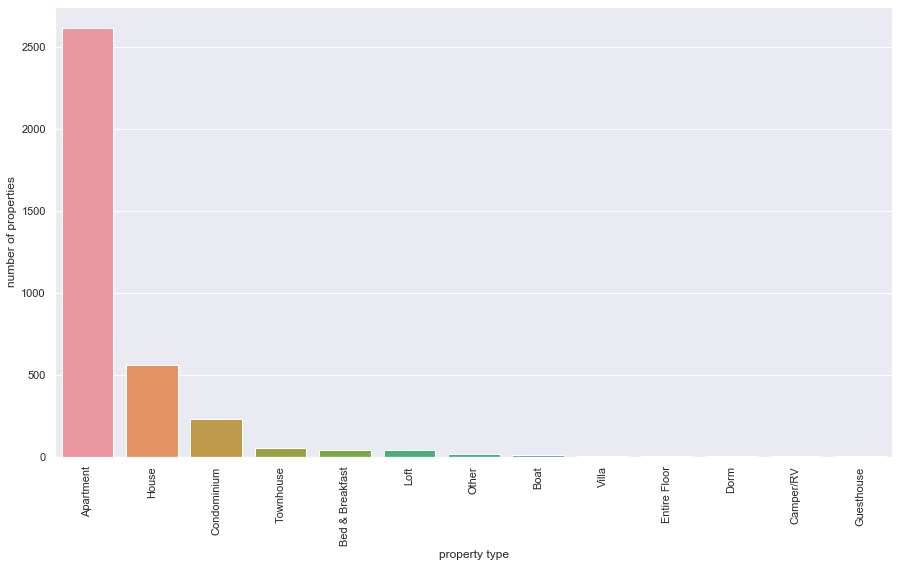

In [15]:
## ploting the count of each of the property type
data = listings.groupby(['property_type']).id.count().reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
data.columns = ['property type', 'number of properties']
data = data.sort_values('number of properties', ascending=False)
g = sns.barplot(data=data, x='property type', y='number of properties')
plt.xticks(rotation=90)
plt.show()

### Explanation
- We can clearly see that there is a concentration of listings in Back Bay and South End. The color of the neighborhood is encoded with the listings count in that neighborhood. Using that we can see that Jamaica Plain(343), South End(326), Back Bay(302) are among the top three in listings count.

- entire room/apartment is one of the prominent offerings (2127), the second is Private room(1378) and lastly shared room(80). With respect to property type Apartment(over 2500 listings) is at first, then house(over 500) and then condo, town house, bed & breakfast and so on.


## 2. What is the availability of the listings across each neighbourhood and their review/reponsiveness ?

Review and host response and avaialibility are columns in listings dataframe. 
- We have availabity for 30 days, 60 days, 90 days and a year. 
- Similary host responsiveness is categorized in 'a few days or more', 'within a day', 'within a few hours', 'within an hour'
- for review and rating we have cleanliness review, communication review, check-in review and location review.

### Visualization

First looking for listings availabilities:

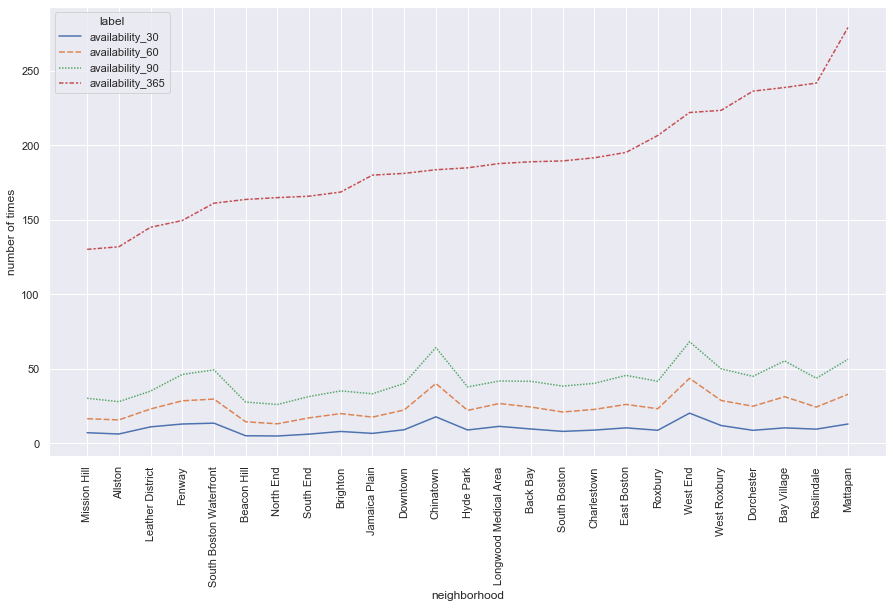

In [16]:
# groupby neighborhood to get all mean availability days in each category
df = listings.groupby(['neighbourhood_cleansed']).agg({'availability_30':'mean', 'availability_60':'mean', 'availability_90':'mean', 'availability_365':'mean'}).sort_values('availability_365').reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
# melt the dataframe
data = pd.melt(df, ['neighbourhood_cleansed'])
data.columns = ['neighborhood', 'label', 'number of times']
# doing a line plot
g = sns.lineplot(data=data, x='neighborhood', y='number of times', hue='label', style='label')
plt.xticks(rotation=90)
plt.show()

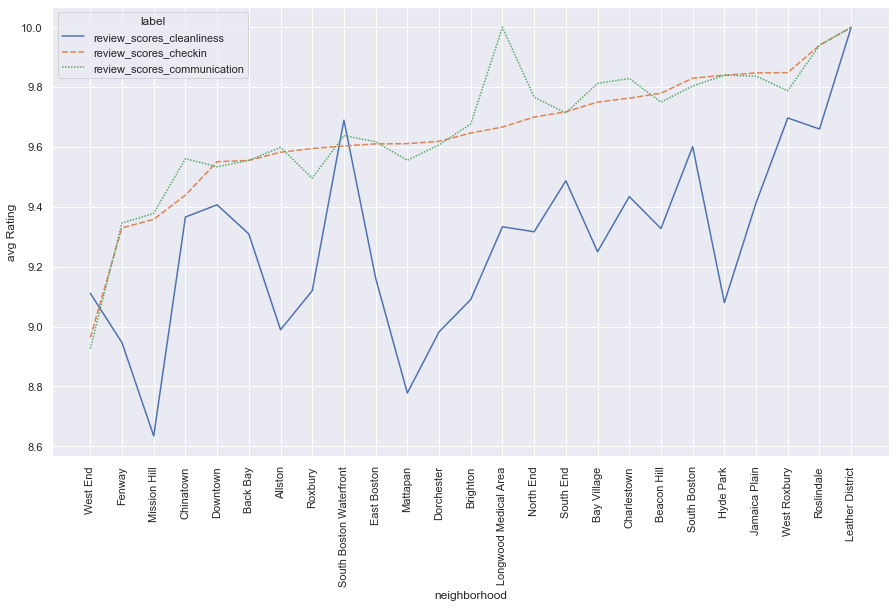

In [17]:
# groupby neighborhood to get all mean rating score in each category
df = listings.groupby('neighbourhood_cleansed').agg({'review_scores_cleanliness':'mean',
       'review_scores_checkin':'mean', 'review_scores_communication':'mean',
        'review_scores_rating':'mean'})\
        .sort_values('review_scores_checkin').drop('review_scores_rating', axis=1).reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
data = pd.melt(df, ['neighbourhood_cleansed'])
data.columns = ['neighborhood', 'label', 'avg Rating']
# ploting
g = sns.lineplot(data=data, x='neighborhood', y='avg Rating', hue='label', style='label')
plt.xticks(rotation=90)
plt.show()

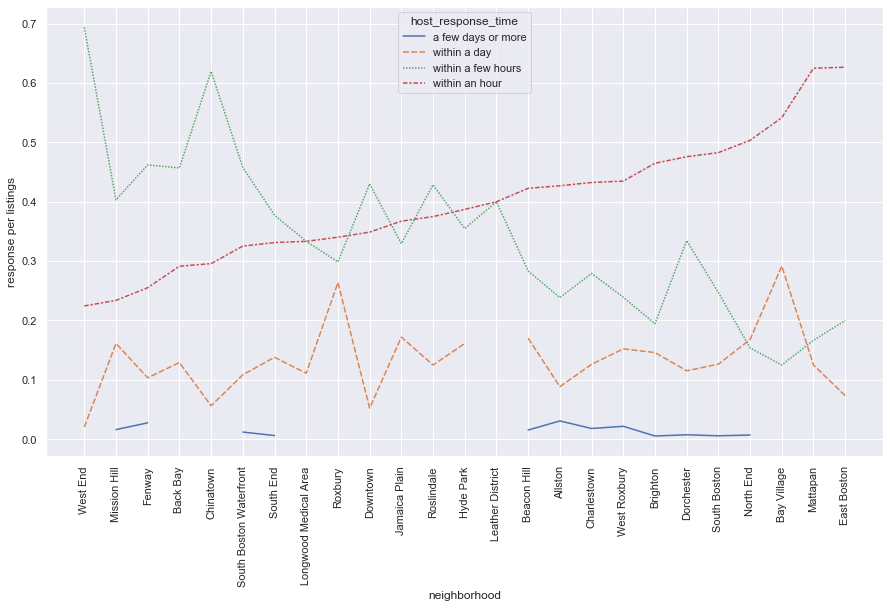

neighborhood  host_response_time  response per listings
0       West End  a few days or more                    NaN
1   Mission Hill  a few days or more               0.016129
2         Fenway  a few days or more               0.027586
3       Back Bay  a few days or more                    NaN
4      Chinatown  a few days or more                    NaN
..           ...                 ...                    ...
95  South Boston      within an hour               0.482759
96     North End      within an hour               0.503497
97   Bay Village      within an hour               0.541667
98      Mattapan      within an hour               0.625000
99   East Boston      within an hour               0.626667

[100 rows x 3 columns]

In [18]:
# groupby neighborhood and host response time to get all count of listings in each category
df = listings.groupby(['neighbourhood_cleansed', 'host_response_time']).agg({'id':'count'}).sort_values(['host_response_time','id']).reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighborhood', 'host_response_time', 'count']

# getting the listing count in each neighborhood
df2= listings.groupby('neighbourhood_cleansed').id.count().reset_index()
df2.columns = ['neighborhood', 'listings count']
# joining two datframe
df = pd.merge(df, df2, on='neighborhood')
# calculating the response count per listing for the plot
df['response per listings'] = df['count'] / df['listings count'] 

df = pd.pivot_table(df, values='response per listings', index=['neighborhood'], columns=['host_response_time']).sort_values('within an hour')
df = pd.melt(df.reset_index(), id_vars=['neighborhood'], value_vars=['a few days or more', 'within a day', 'within a few hours', 'within an hour'])
df.columns = ['neighborhood', 'host_response_time', 'response per listings']

#ploting
g = sns.lineplot(data=df, x='neighborhood', y='response per listings', hue='host_response_time', style='host_response_time')
plt.xticks(rotation=90)
plt.show()

df

### Explanation
- Availability is not constant among all neighborhood. Mission Hill, Allston, Leather District offers average availability of ~150 days in a year while Dorchester, Bay Village, Roslindale and Mattapan offer ~220 days in a year.
- If you want your queries to be resolved within the hour, Bay Village, Mattapan and East Boston is your best bet. In these areas, more than 55% of the listing’s hosts have responded within an hour. If you don’t mind few hours of wait, you can go with West End and China Town with more than 60% of the listing’s hosts have responded within a few hours.
- If we look for check-in and cleanliness only, the least rating is about 9 belonging to West End’s listings. Leather District is at the top, with an average rating of 10 in terms of check-in, cleanliness and communication. Apart from it, Jamaica Plain, West Roxbury and Roslindale is among the high rated neighborhoods.

## 3. What is the price trend among the neighbourhood throughout the year?what is the weekend price trend?

Price is also given in listings and calendar dataframe, But here I will be using price data from calendar for calculating the mean price among each neighborhood and in each month. For getting the weekly trend I have done the same thing week wise

### Analyse

### Visualization

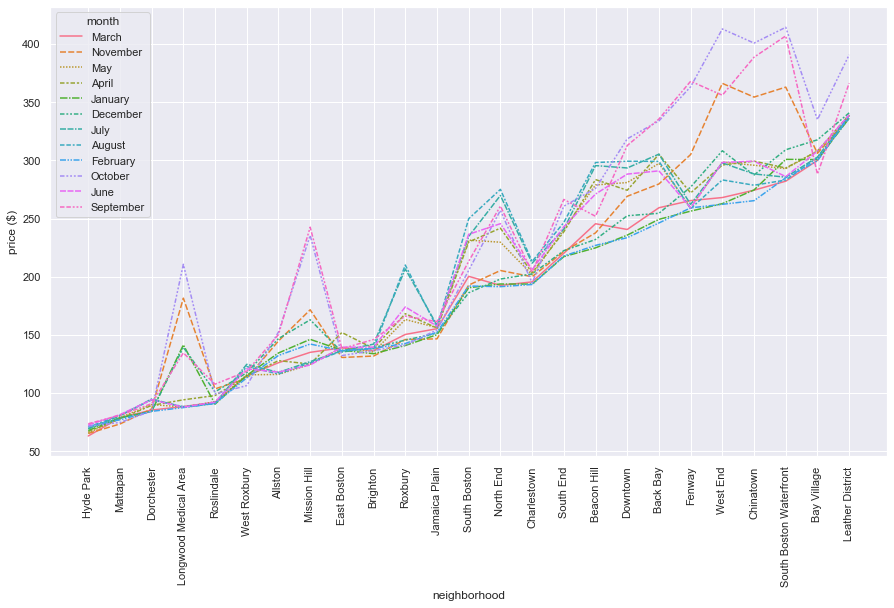

In [19]:
# join listing data and calendar data for available days
df = pd.merge(listings[['id', 'neighbourhood_cleansed']], calendar[['listing_id', 'price', 'month_name']], left_on='id', right_on='listing_id')
# group the data by each neighborhood and month and calculate price mean
df = df.groupby(['neighbourhood_cleansed', 'month_name']).agg({'price':'mean'}).sort_values('price').reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighborhood', 'month', 'price ($)']
# plot the data
g = sns.lineplot(data=df, x='neighborhood', y='price ($)', hue='month', style="month")
plt.xticks(rotation=90)
plt.show()


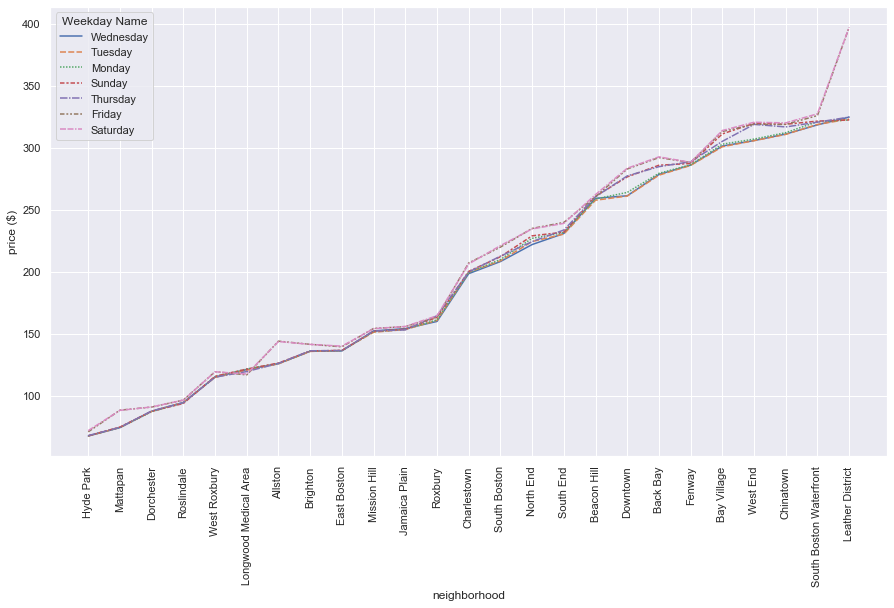

In [20]:
# join listing data and calendar data for available days
df = pd.merge(listings[['id', 'neighbourhood_cleansed']], calendar[['listing_id', 'price', 'Weekday Name']], left_on='id', right_on='listing_id')
# group the data by each neighborhood and week and calculate price mean
df = df.groupby(['neighbourhood_cleansed', 'Weekday Name']).agg({'price':'mean'}).sort_values('price').reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighborhood', 'Weekday Name', 'price ($)']
g = sns.lineplot(data=df, x='neighborhood', y='price ($)', hue='Weekday Name', style="Weekday Name")
plt.xticks(rotation=90)
plt.show()

Weekday Name       price
2     Saturday  203.408387
0       Friday  203.121167
3       Sunday  198.219764
4     Thursday  198.073112
1       Monday  195.809561
6    Wednesday  195.418228
5      Tuesday  195.173842

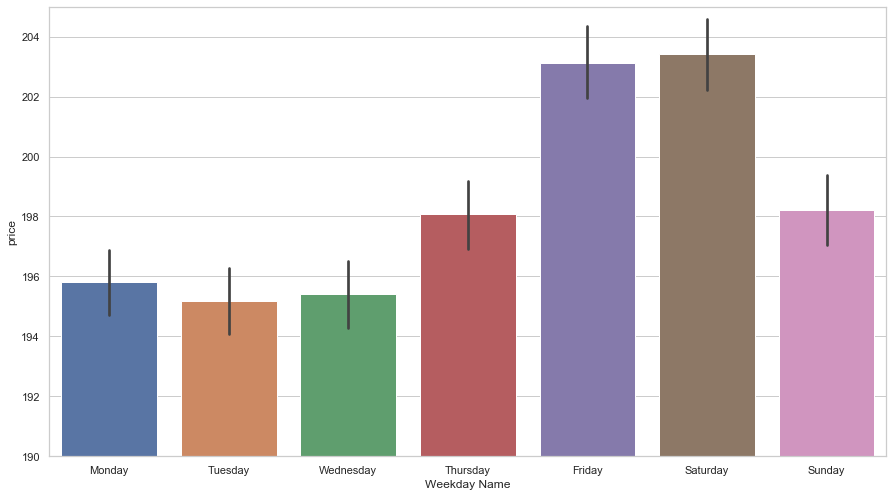

In [21]:
# extract out the available listings from calendar
available = calendar
sns.set_theme(style="whitegrid")
# plot the bar for each week using seaborn
ax = sns.barplot(x="Weekday Name", y="price", data=available.sort_values("Weekday No"))
ax.set_ylim(190,205)
calendar.groupby('Weekday Name').price.mean().reset_index().sort_values('price', ascending=False)

### Explanation
- Looking at the Boston listings datasets, we can in general see a trend in price among neighborhoods. West End, Chinatown, South Boston Water Front, Bay Village and Leather District are among highly-priced neighborhoods with average listing price going for over 400 dollar.
- these neighborhood are costlier in September, October and November with an average increase of 100 dollar from other months. Hyde Park, Mattapan and Dorchester are among cheaper options with average listings price of under 100 dollar.
- On weekly basis, we can see there is not much variation in the price in some neighborhood, while in some like Bay Village, West End, China Town, Down Town, Back Bay and Leather District we can see some variations based on weekdays.
- On plotting the bar chart we can see that Friday and Saturdays are priced 7 dollar more on average. From the previous chart, we also saw that this variation is not the same. For instance, Leather District has this difference of about 75 dollar.

### How are different types of room priced in boston?

### Analyse
There are three types of room offered in Boston, 


### Visualize

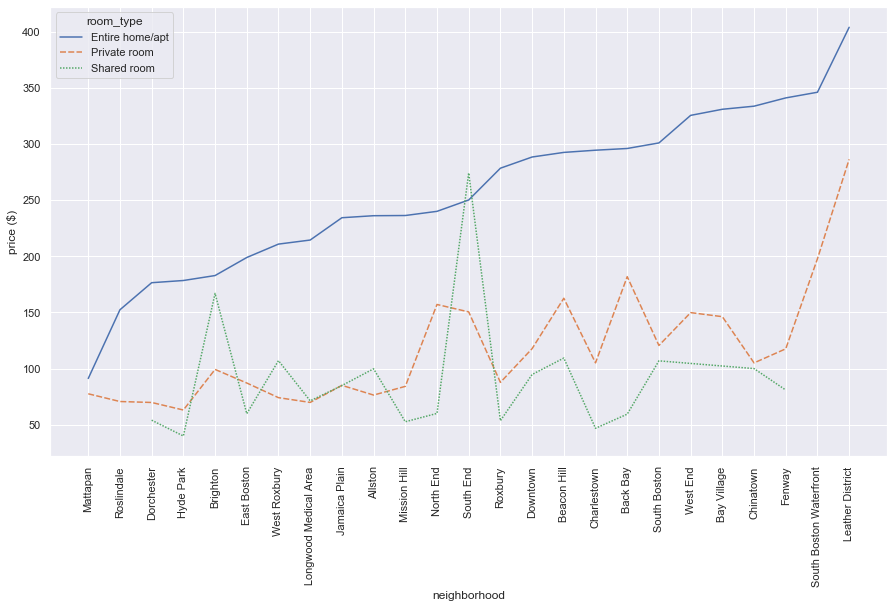

In [22]:
# merge listings and calendar data for available days
df = pd.merge(listings[['id', 'neighbourhood_cleansed', 'room_type']], calendar[['listing_id', 'price']], left_on='id', right_on='listing_id')
# group by neighborhood and room type and calculate mean of each group
df = df.groupby(['neighbourhood_cleansed', 'room_type']).agg({'price':'mean'}).sort_values(['room_type','price']).reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighborhood', 'room_type', 'price ($)']
# plot
g = sns.lineplot(data=df, x='neighborhood', y='price ($)', hue='room_type', style='room_type')
plt.xticks(rotation=90)
plt.show()


### Explaination
- If we see the pricing on the basis of room type, Entire home/apartment is almost always priced high. Private rooms are second-costliest room type followed by shared rooms.

## 4. Which amenities, in general can you expect and what are some of rare ammenties and how much extra you have to pay to get those?

### Analyze
Count the occurance of each amenities along each room type and then calculate the fraction by dividing with its listing count

In [23]:
# explode amenities
df = listings[['room_type', 'amenities']].explode('amenities')
# set occurance/count as 1
df['count'] = 1
df = pd.pivot_table(df, values='count', index=['amenities'], columns=['room_type'], aggfunc={'count':np.sum}).sort_values('Entire home/apt', ascending=False)

# calculating fraction
df = (df/listings.groupby('room_type').id.count()).sort_values(['Entire home/apt', 'Private room', 'Shared room'], ascending=False)
df = df[df.index != '']


In [24]:
print(f"Amenities count {df.shape[0]}")

Amenities count 45


Printing top 10 available amenities in boston

In [25]:
df.head(10)

room_type          Entire home/apt  Private room  Shared room
amenities                                                    
Kitchen                   0.975082      0.829463       0.8375
Heating                   0.966620      0.915094       0.8375
Wireless Internet         0.961918      0.947750       0.8625
Air Conditioning          0.878232      0.656023       0.6125
TV                        0.869299      0.519594       0.5250
Essentials                0.858016      0.806967       0.7125
Smoke Detector            0.806300      0.827286       0.7000
Internet                  0.780442      0.635704       0.5125
Dryer                     0.724024      0.640784       0.6625
Washer                    0.723084      0.641509       0.6625

Printing least 10 available amenities in boston

In [26]:
df.tail(10)

room_type                  Entire home/apt  Private room  Shared room
amenities                                                            
Lock on Bedroom Door              0.048895      0.266328       0.0375
Dog(s)                            0.046074      0.094340       0.0125
Suitable for Events               0.034791      0.040639       0.1000
Hot Tub                           0.024918      0.078374       0.0750
Cat(s)                            0.024448      0.089260       0.0750
Smoking Allowed                   0.010343      0.047170       0.1000
Other pet(s)                      0.002821      0.007257          NaN
Paid Parking Off Premises         0.001881           NaN          NaN
Free Parking on Street            0.000940      0.004354       0.0125
Washer / Dryer                    0.000940           NaN          NaN

### How much extra do you need to pay for getting all the top 10 amenities?

Trying to see the difference in groups using box plot

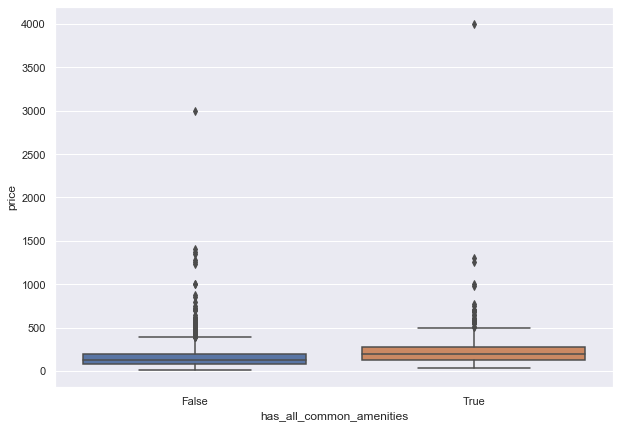

In [27]:
normal_amenities = set(df.head(10).index.values)
listings['has_all_common_amenities'] = listings.amenities.apply(lambda x: len(normal_amenities - set(x)) == 0)
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="has_all_common_amenities", y="price", data=listings)

Printing the mean price of listings with all common amenities

In [28]:
listings.groupby('has_all_common_amenities').price.mean().reset_index()

has_all_common_amenities       price
0                     False  156.089293
1                      True  220.161323

### Explanation
- there are about 45 different amenities provided. So, there is a good chance you will find what you need here.
- kitchen, Heating, Internet, Air conditioning, TV and so on are provided in more than 50% of the listings as we expect. 
- If we set up 60% as cut-off, we can see from the table that we can always get all these amenities from an apartment or Private room; but shared room only offers Kitchen, Heating and Wifi only in their 60% listings.
- On average listings with all common amenities costs around 220 dollar while others only cost around 156 dollar.
- Washer/Dryer, Hot tub, Smoking Allowed, Pets are among a few rare amenities allowed in Boston Airbnb listings.

## 5. Which neighbourhood is seeing surge in listings?

### Analyse
listings has host_since column which depicts the date at which that listing was made available. If we can calculate the difference of host_since and the most recent listing date, we can get the host since information in days. Using this we can filter the listings which were listed in last, say, 90 days and do our analysis for calculate count of new listing of percentage change in each neighborhood

### Visualization

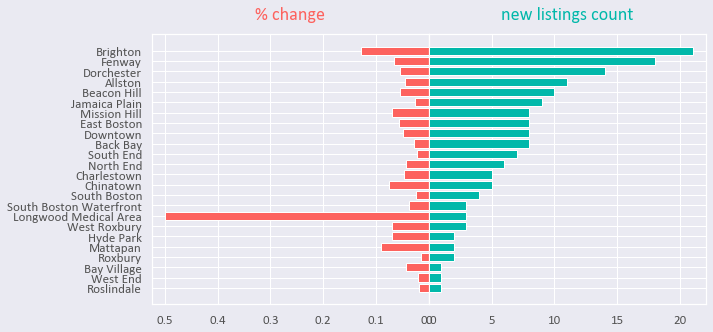

neighbourhood  new_listings_count  old_listings_count  \
4                  Brighton                  21                 164   
10                   Fenway                  18                 272   
7                Dorchester                  14                 255   
0                   Allston                  11                 249   
3               Beacon Hill                  10                 184   
12            Jamaica Plain                   9                 334   
15             Mission Hill                   8                 116   
9               East Boston                   8                 142   
8                  Downtown                   8                 164   
1                  Back Bay                   8                 294   
21                South End                   7                 319   
16                North End                   6                 137   
5               Charlestown                   5                 106   
6                 Chinatown                   5                  66   
19             South Boston                   4                 170   
20  South Boston Waterfront                   3                  80   
13    Longwood Medical Area                   3                   6   
23             West Roxbury                   3                  43   
11                Hyde Park                   2                  29   
14                 Mattapan                   2                  22   
18                  Roxbury                   2                 142   
2               Bay Village                   1                  23   
22                 West End                   1                  48   
17               Roslindale                   1                  55   

    percentage  
4     0.128049  
10    0.066176  
7     0.054902  
0     0.044177  
3     0.054348  
12    0.026946  
15    0.068966  
9     0.056338  
8     0.048780  
1     0.027211  
21    0.021944  
16    0.043796  
5     0.047170  
6     0.075758  
19    0.023529  
20    0.037500  
13    0.500000  
23    0.069767  
11    0.068966  
14    0.090909  
18    0.014085  
2     0.043478  
22    0.020833  
17    0.018182

In [29]:
# using 90 days
days_old = 90
listings['host_since'] = pd.to_datetime(listings['host_since'])
# calculating the most recent listing date
max_host = listings['host_since'].max()
# calculating host since in days
listings['host_since(days)'] = (max_host - listings['host_since']).dt.days
# getting the count of all new listings in each neighborhood
df = listings[listings['host_since(days)']<days_old].groupby(['neighbourhood_cleansed']).id.count().reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighbourhood', 'new_listings_count']
df2 = listings[listings['host_since(days)']>=days_old].groupby(['neighbourhood_cleansed']).id.count().reset_index()
df2.columns = ['neighbourhood', 'old_listings_count']

df = pd.merge(df, df2, on="neighbourhood")
# calculating the percentage
df['percentage'] = df['new_listings_count']/df['old_listings_count']
df =  df.sort_values('percentage', ascending=False)
df = df.sort_values('new_listings_count', ascending=False)

# setting up some variable for plotting
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df.neighbourhood
column0 = df['percentage']
column1 = df['new_listings_count']
title0 = '% change'
title1 = 'new listings count'


# intializing plot
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

# ploting both count and percentage data        
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
    
        
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.show()
df

### what is the room type are newly listed?

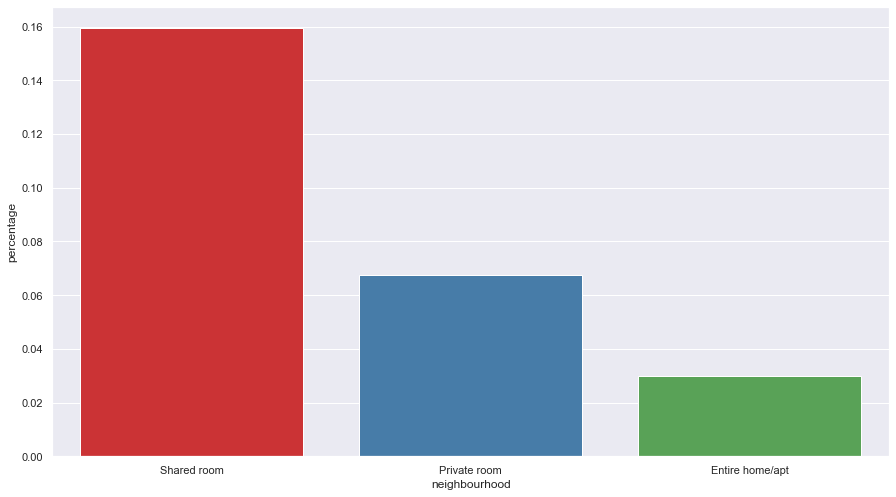

neighbourhood  new_rooms  all_rooms  percentage
2      Shared room         11         69    0.159420
1     Private room         87       1291    0.067390
0  Entire home/apt         62       2065    0.030024

In [30]:
#recent
days_old = 90
listings['host_since'] = pd.to_datetime(listings['host_since'])
max_host = listings['host_since'].max()
listings['host_since(days)'] = (max_host - listings['host_since']).dt.days
df = listings[listings['host_since(days)']<days_old].groupby(['room_type']).id.count().reset_index()
df.columns = ['neighbourhood', 'new_rooms']

#overall
df2 = listings[listings['host_since(days)']>=days_old].groupby(['room_type']).id.count().reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df2.columns = ['neighbourhood', 'all_rooms']

df = pd.merge(df, df2, on="neighbourhood")
df['percentage'] = df['new_rooms']/df['all_rooms']
df =  df.sort_values('percentage', ascending=False)

g = sns.barplot(data=df, x='neighbourhood', y='percentage', palette="Set1")

sns.set(rc={'figure.figsize':(15,8.27)})
# plt.xticks(rotation=45)
plt.show()
df

### Explanation
-  Brighton(21), Fenway (18) and Dorchester(14) are among the top 3 neighborhood with new listings in the past 90 days. Roslindale, West End and Bay Village have the least new listings added.
- Percentage-wise, Longwood Medical Area has surged in new listings as the number of listings doubled in the last 90 days.
- there is a surge in shared rooms offering which increased by 16% followed by private room at 7% and apartments at 3% in the past 90 days.